# Difference of Gaussians (DoG)
***
Difference of Gaussians (DoG) can be useful in increasing edge visibility and other details present in a digital image. It is highly effective at removing random noise from images, and is often preferred over other edge-sharpening techniques when the image contains a high frequency of noise. The major drawback to DoG is the loss of contrast that comes with using this method.

The DoG is also extremly useful for approximating the Laplacian of Gaussian (LoG) filtering method. This is extremely important because LoG is very computationally expensive. Using the DoG instead of LoG makes feature detection methods like Scale Invariant Feature Transform (SIFT) much more efficient.
***
## Setup

In [1]:
# notebook imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## 1D DoG
***

Please take a look at the references for all math done in the following methods.

The first method creates a gaussian distribution uisng the parameters passed in and applying the 1D Gaussian function.

In [2]:
# creating 1D gaussian function
def gauss_1d(x_range, mean, sigma):
    x = np.arange(-x_range, x_range, .01)
    variance = np.square(sigma)
    gauss_dist = np.exp(-np.square(x-mean)/(2*sigma))/(np.sqrt(2*np.pi*variance))
    return gauss_dist

This method returns a 1D DoG with a negative peak, because LoG is often implemented in the same way. This can be switched to a positive peak by switching the inequality.

In [4]:
def DoG_1d(x_range, mean, sigma1, sigma2):
    if sigma1 > sigma2:
        return gauss_1d(x_range, mean, sigma1) - gauss_1d(x_range, mean, sigma2)
    return gauss_1d(x_range, mean, sigma2) - gauss_1d(x_range, mean, sigma1)

This method is a helper method to plot 1D gaussian distributions.

In [5]:
def plot_gauss_1d(points):
    x_range = len(points) * 0.01/2
    x = np.arange(-x_range, x_range, .01)
    plt.plot(x, points)
    plt.show()

In [15]:
g1 = gauss_1d(5, 0, 1)
g2 = gauss_1d(5, 0, 2)
combined = DoG_1d(5, 0, 1, 2)

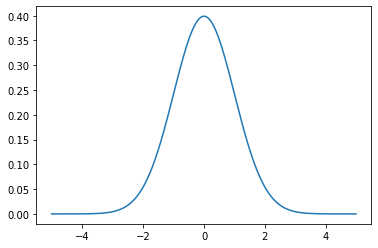

In [16]:
plot_gauss_1d(g1)

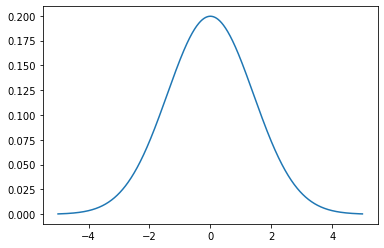

In [17]:
plot_gauss_1d(g2)

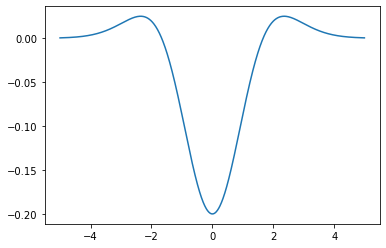

In [7]:
plot_gauss_1d(combined)

This is what a DoG distribution should look like. It closely resembles an LoG.

## 2D DoG
***

Now for 2D.

This method creates a 2D gaussian distribution with the desired x and y ranges.

In [8]:
# x, y are ranges
def gauss_2d(x, y, mean, sigma):
    x, y = np.mgrid[-x:x:.01, -y:y:.01]
    x = np.square(x - mean)
    y = np.square(y - mean)
    variance = np.square(sigma)
    gauss_vals = np.exp(-(x + y)/(2 * variance)) / (2 * np.pi * variance)
    return gauss_vals

Like the 1D DoG, this method will return a 2D DoG with a negative peak for the same reasons.

In [9]:
def DoG_2d(x, y, mean, sigma1, sigma2):
    if sigma1 > sigma2:
        return gauss_2d(x, y, mean, sigma1) - gauss_1d(x, y, mean, sigma2)
    return gauss_2d(x, y, mean, sigma2) - gauss_2d(x, y, mean, sigma1)

This is a helper method for plotting 2D Gaussian surfaces.

In [10]:
def plot_gauss_2d(points, angle1=30, angle2=30):
    xv, yv = np.mgrid[0:len(points), 0:len(points[0])]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    dem3d=ax.plot_surface(xv,yv,points, cmap='winter', edgecolor='none')
    ax.view_init(angle1, angle2)
    plt.show()

In [11]:
g2d1 = gauss_2d(5, 5, 0, 1)
g2d2 = gauss_2d(5, 5, 0, 2)
combined_gauss2d = DoG_2d(5, 5, 0, 1, 2)

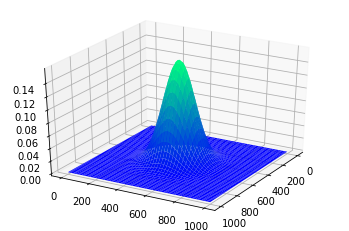

In [13]:
plot_gauss_2d(g2d1)

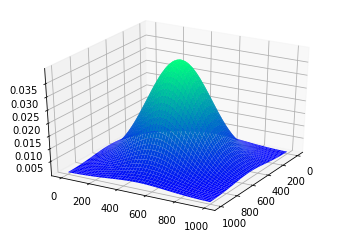

In [14]:
plot_gauss_2d(g2d2)

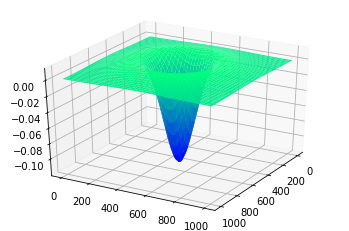

In [100]:
plot_gauss_2d(combined_gauss2d)

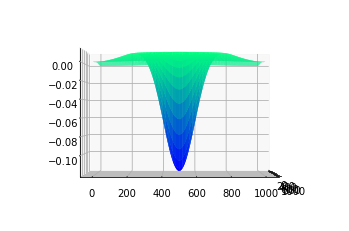

In [101]:
plot_gauss_2d(combined_gauss2d, 0, 0)

Similar to 1D, the 2D DoG has a negative peak with points that are positive before leveling out to 0.

***
## References
* http://fourier.eng.hmc.edu/e161/lectures/gradient/node9.html
* http://pages.stat.wisc.edu/~mchung/teaching/MIA/reading/diffusion.gaussian.kernel.pdf.pdf
* https://en.wikipedia.org/wiki/Difference_of_Gaussians
***